>[What is PCA?](#scrollTo=1KM-83jw28mS)



# What is PCA?

In simple words, PCA is a multivariate analysis technique (very advanced statistics) that combines concepts of linear algebra and statistics and the purpose of this method is to REDUCE, not eliminate, but reduce the same information of all our variables (dimensions) to new variables that we will call principal components, and these variables will 1. explain the same information as the strongest variables or with more variability 2. additionally contain as much information as possible from the other dimensions that do not yield as much information or that are not as correlated,
FOR EXAMPLE

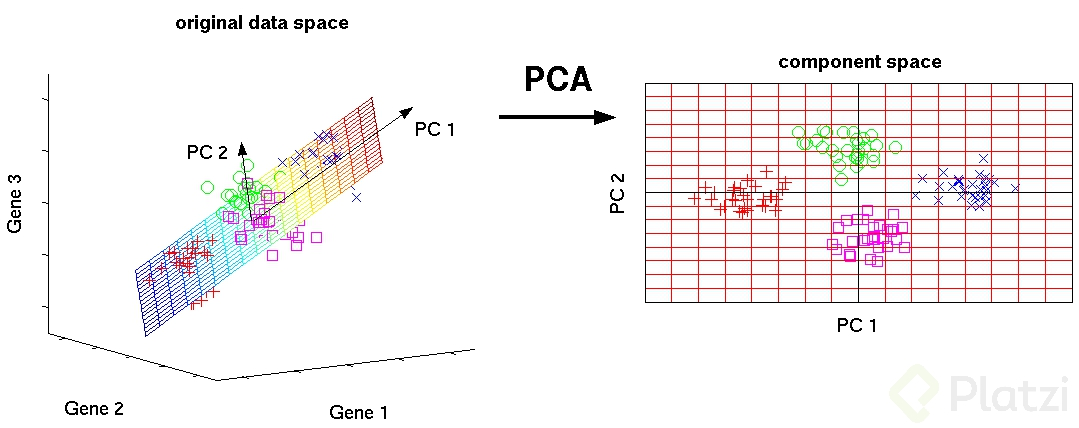

Let's observe that in the image we are in R3 that is to say we have 3 dimensions but we observe that really the correlation and the greater information are concentrated more in two certain regions where we can obtain eigenvectors that describe the direction of these data, PERFECT this is going to be our new axis an axis in R2 where the information of the info of our 3rd dimension now is together with the other two dimensions not to be in a plane R3 but R2.
Is 100% of our original information preserved? NO, but it is useful if suppose we do a very expensive experimentation where the third action for our survey is not very relevant, a PCA before helps us to see what are the MAIN COMPONENTS worth focusing on.

Maldition of dimension: For each variable added we will need extremely much data else.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

x = 3*np.random.rand(200)
y = 20*x + 2*np.random.rand(200)

x = x.reshape(200, 1)
y = y.reshape(200, 1)

In [ ]:
xy = np.hstack([x, y]) #union of vectors
print(xy.shape)

(200, 2)


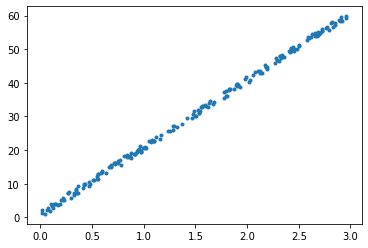

In [ ]:
#Dispersion plot

plt.plot(xy[:,0], xy[:,1], '.')
plt.show()

We might reduce the dimension of the data in order to represent it in only a variable, say $X$, such that the variance error is mininum.

In [ ]:
xy_centered = xy-np.mean(xy, axis=0)

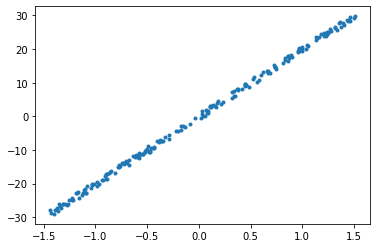

In [ ]:
plt.plot(xy_centered[:,0], xy_centered[:,1], '.')
plt.show()

We want to find a value $d$ such that

$$
  d = max_{d\in\mathbb{R}^n}Tr(d^TX^TXd)
$$
and we request the vector $d$ where $||d||_2=1$.

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(xy_centered.T.dot(xy_centered))
print(eigen_values)

[1.70408413e-01 6.24117888e+04]


Notice that the eigenvector associated to the maximum of the eigen values says **the direction of maxima variance**.

In [ ]:
%run "/content/drive/MyDrive/cursos_platzi/Linear-algebra-in-python/auxiliar_functions/plot_vectors.ipynb"

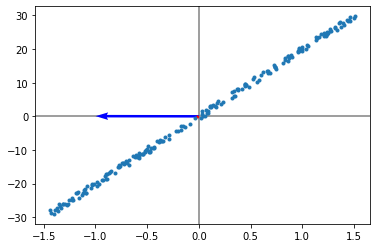

In [ ]:
plot_vectors(eigen_vectors.T, ['blue', 'red'])
plt.plot(xy_centered[:,0], xy_centered[:,1], '.')
plt.show()

Here we might scale the red vector in order to get a better visualization:

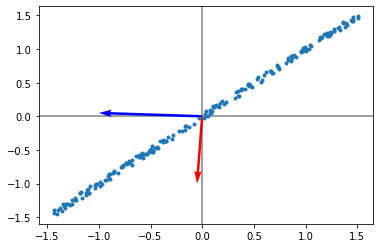

In [ ]:
plot_vectors(eigen_vectors.T, ['blue', 'red'])
plt.plot(xy_centered[:,0], xy_centered[:,1]/20, '.')
plt.show()

In [ ]:
print(np.max(eigen_values))

62411.78877548416


Here the eigenvalue `62411.78877548416` says that de red eigen vector says the direction of maxima variance.

In [ ]:
xy_new = eigen_vectors.T.dot(xy_centered.T)

Now we obtain a cloud of data were we can take only de $Y$ variable cause captures the most variance of the data.

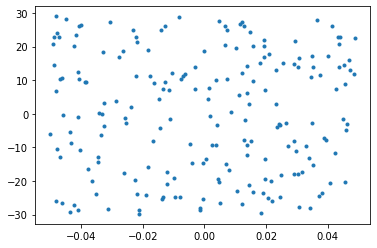

In [ ]:
plt.plot(xy_new[0,:], xy_new[1,:], '.')
plt.show()

For more info visit [Análisis de Componentes Principales](https://www.cienciadedatos.net/documentos/35_principal_component_analysis).

[Why Data Normalization is necessary for Machine Learning models](https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029)

---
*Let’s change the world, Together!*


<img align=centerright src="https://www.notion.so/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F202df933-5432-47f6-aba6-a9a054cece4b%2Fpages-PhotoRoom.png?table=block&id=0b1ffffe-7be4-41f2-86dd-26cad410a64b&spaceId=12eea25e-0790-4a8f-aa1c-b60f93c02da2&width=250&userId=4be5c684-7292-494e-bbb2-2554f1af3879&cache=v2"  width="70" height="70">

<img align=centerright src="https://cdn-icons-png.flaticon.com/512/25/25231.png"  width="70" height="70">
<img align=centerright src="https://cdn-icons-png.flaticon.com/512/61/61109.png?w=360"  width="70" height="70">
<img align=centerright src="https://cdn-icons-png.flaticon.com/512/39/39552.png"  width="70" height="70">
<img align=centerright src="https://cdn.freebiesupply.com/images/large/2x/instagram-icon-white-on-black.png"  width="100" height="70">

[Personal Blog](https://santiagoal.super.site/)      [GitHub](https://github.com/santiagoahl)    [LinkedIn](https://www.linkedin.com/in/santiago-ahumada-lozano/)   [Twitter](https://twitter.com/sahumadaloz)  [Instagram](https://www.instagram.com/santiago_al10/)
